In [582]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#### Importing the important library

In [583]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Stastical informations

In [584]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### datatype info

In [585]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:xlabel='Survived', ylabel='count'>

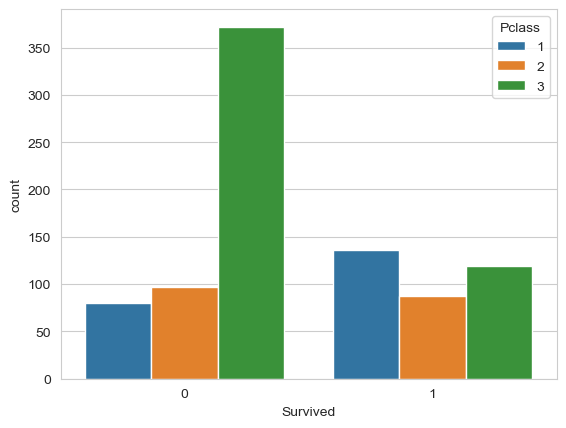

In [586]:
sns.countplot(x='Survived', data=train, hue="Pclass")

#### Exploratory Data Anslysis

<AxesSubplot:xlabel='Pclass', ylabel='count'>

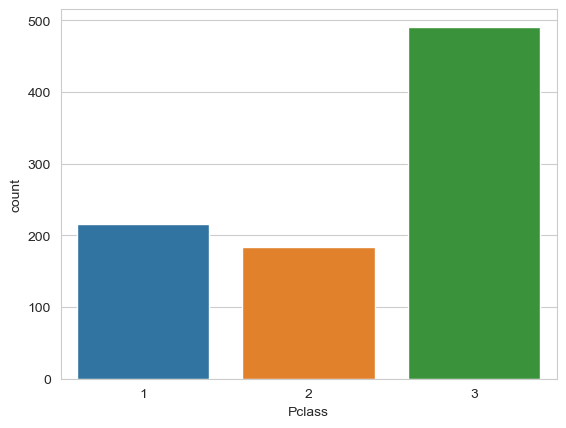

In [587]:
sns.countplot(train['Pclass'])

<AxesSubplot:xlabel='Sex', ylabel='count'>

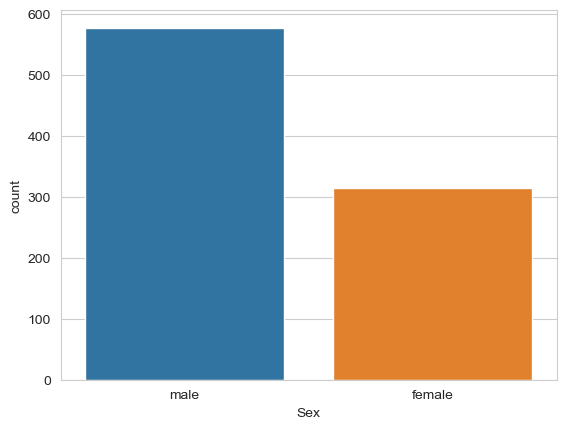

In [588]:
sns.countplot(train['Sex'])

<AxesSubplot:xlabel='SibSp', ylabel='count'>

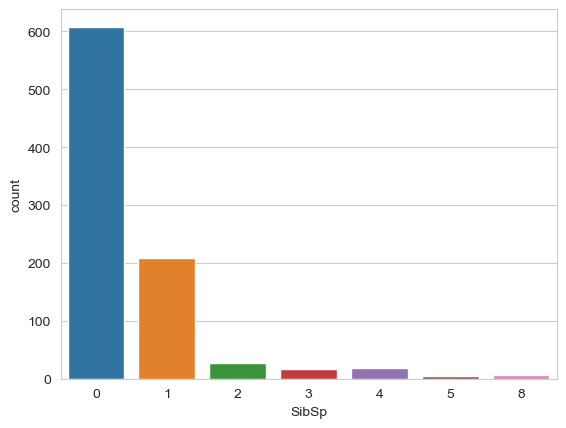

In [589]:
sns.countplot(train['SibSp'])

<AxesSubplot:xlabel='Parch', ylabel='count'>

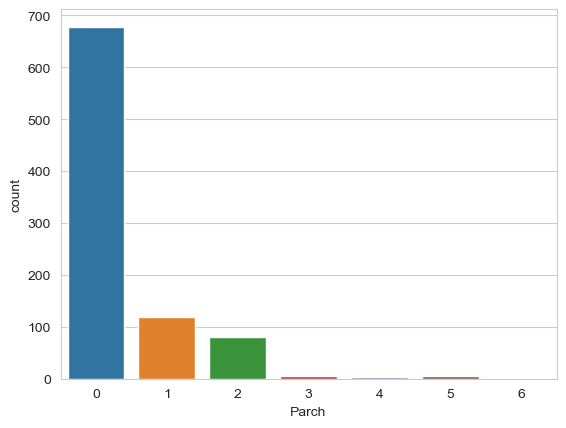

In [590]:
sns.countplot(train['Parch'])

<AxesSubplot:xlabel='Embarked', ylabel='count'>

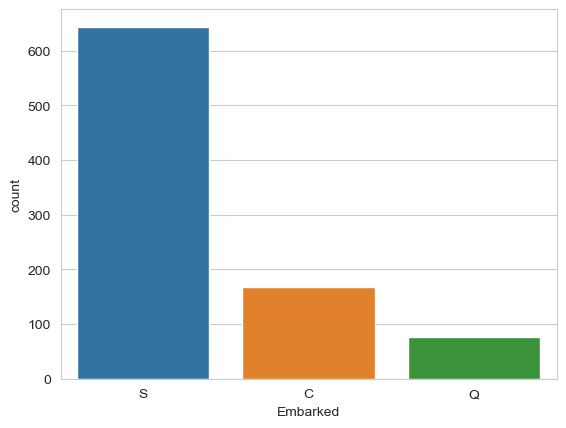

In [591]:
sns.countplot(train['Embarked'])

<AxesSubplot:xlabel='Age', ylabel='Count'>

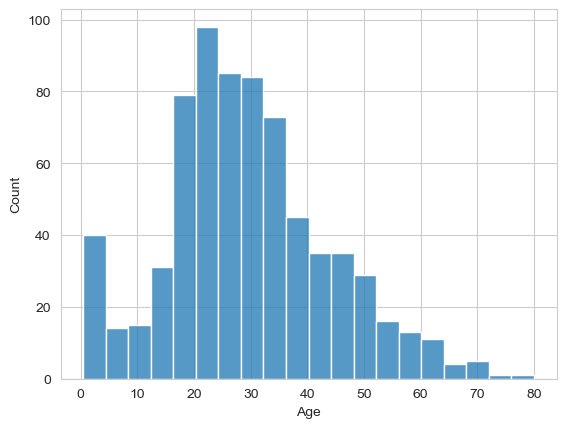

In [592]:
sns.histplot(train['Age'])

<AxesSubplot:xlabel='Fare', ylabel='Density'>

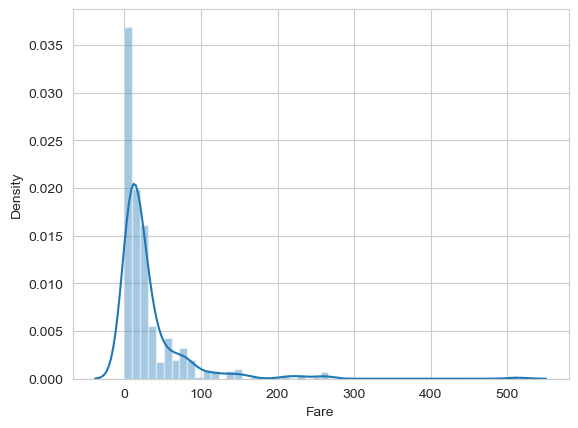

In [593]:
sns.distplot(train['Fare'])

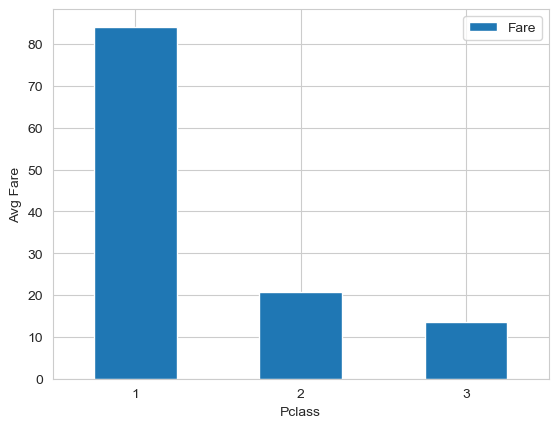

In [594]:
class_fare = train.pivot_table(index='Pclass', values='Fare')
class_fare.plot(kind='bar')
plt.xlabel('Pclass')
plt.ylabel('Avg Fare')
plt.xticks(rotation=0)
plt.show()


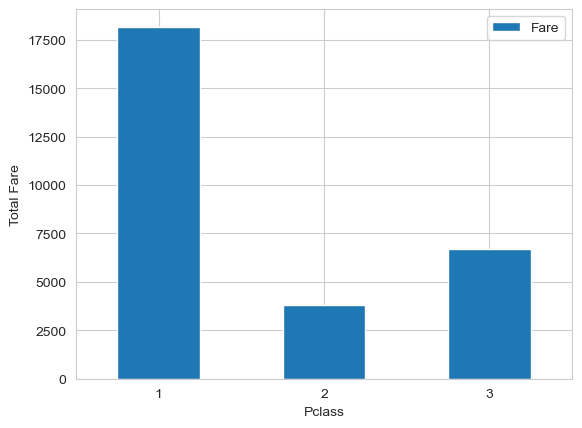

In [595]:
class_fare = train.pivot_table(index='Pclass', values='Fare', aggfunc=np.sum)
class_fare.plot(kind='bar')
plt.xlabel('Pclass')
plt.ylabel('Total Fare')
plt.xticks(rotation=0)
plt.show()

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

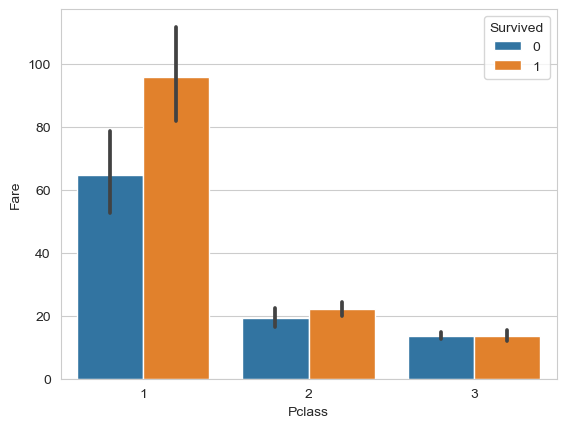

In [596]:
sns.barplot(data = train, y='Fare', x='Pclass', hue='Survived')

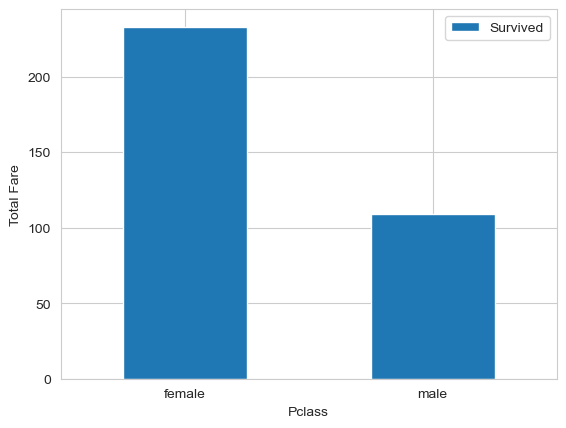

In [597]:
class_fare = train.pivot_table(index='Sex', values='Survived', aggfunc=np.sum)
class_fare.plot(kind='bar')
plt.xlabel('Pclass')
plt.ylabel('Total Fare')
plt.xticks(rotation=0)
plt.show()

#### Data PreProcessing

In [598]:
train_len = len(train)
df = pd.concat([train, test], axis=0)
df = df.reset_index(drop=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [599]:
AgePer = df['Age'].isna().sum()/len(df['Age'])*100
print(AgePer, '%')

20.091673032849503 %


<AxesSubplot:>

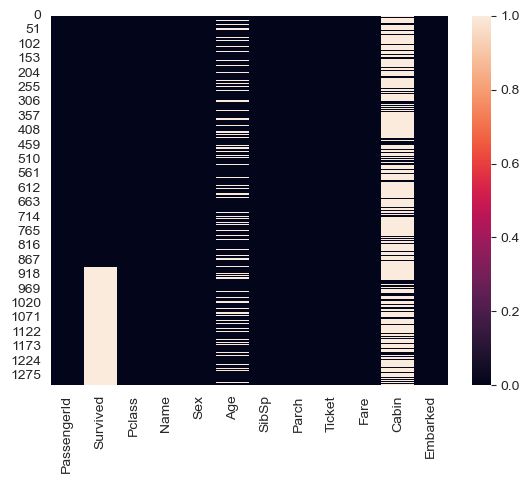

In [600]:
sns.heatmap(df.isna())

In [601]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [602]:
df = df.drop(columns=['Cabin'], axis=1)

In [603]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

<AxesSubplot:>

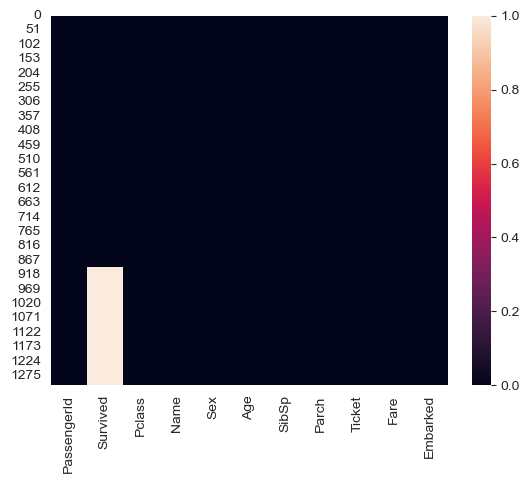

In [604]:
sns.heatmap(df.isna())

<AxesSubplot:xlabel='Fare', ylabel='Density'>

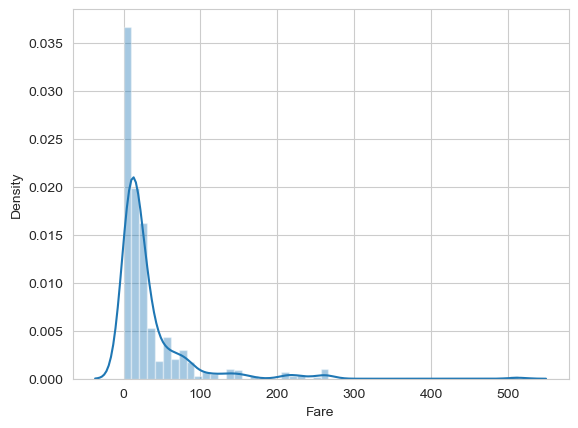

In [605]:
## Log Transformation for uniform data distrubition

sns.distplot(df['Fare'])

In [606]:
df['Fare'] = np.log(df['Fare'] + 1)

<AxesSubplot:xlabel='Fare', ylabel='Density'>

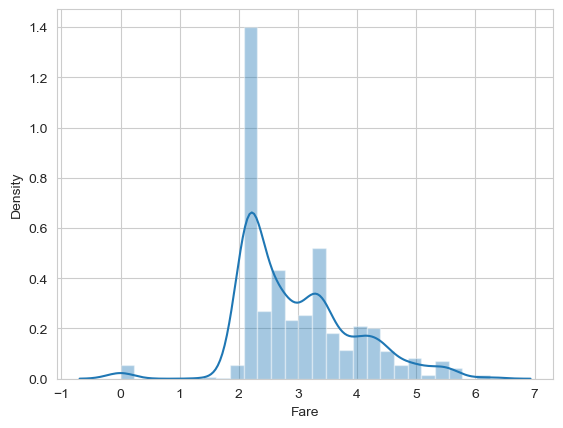

In [607]:
sns.distplot(df['Fare'])

<AxesSubplot:>

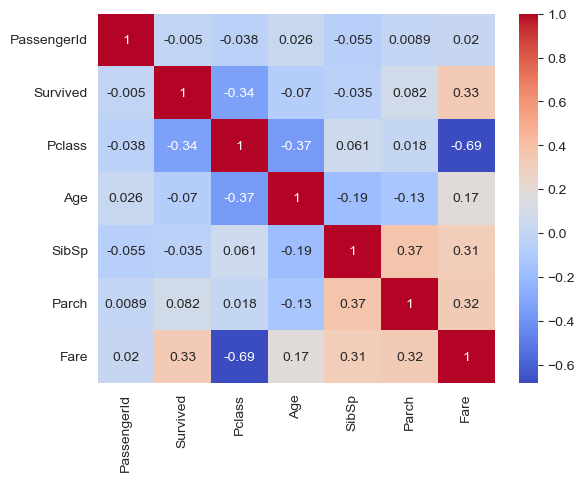

In [608]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [609]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,2.110213,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.280593,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.188856,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.990834,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.202765,S


In [610]:
# Drop unnecassary columns
df = df.drop(columns=['Name', 'Ticket'], axis = 1)

In [611]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = ['Sex', 'Embarked']

for col in cols:
    df[col] = le.fit_transform(df[col])
df.head()
# df['Sex'] = le.fit_transform(df['Sex'])
# df['Embarked'] = le.fit_transform(df['Embarked'])


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,1,22.0,1,0,2.110213,2
1,2,1.0,1,0,38.0,1,0,4.280593,0
2,3,1.0,3,0,26.0,0,0,2.188856,2
3,4,1.0,1,0,35.0,1,0,3.990834,2
4,5,0.0,3,1,35.0,0,0,2.202765,2


In [612]:
## train test split
train = df.iloc[:train_len, :]
test = df.iloc[train_len:, :]
train.tail()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
886,887,0.0,2,1,27.000000,0,0,2.639057,2
887,888,1.0,1,0,19.000000,0,0,3.433987,2
888,889,0.0,3,0,29.881138,1,2,3.196630,2
889,890,1.0,1,1,26.000000,0,0,3.433987,0
890,891,0.0,3,1,32.000000,0,0,2.169054,1


In [613]:
test.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
891,892,NaN,3,1,34.5,0,0,2.178064,1
892,893,NaN,3,0,47.0,1,0,2.079442,2
893,894,NaN,2,1,62.0,0,0,2.369075,1
894,895,NaN,3,1,27.0,0,0,2.268252,2
895,896,NaN,3,0,22.0,1,1,2.586824,2


In [614]:
# input split

X = train.drop(columns=['PassengerId', 'Survived'])
y = train['Survived']

#### Module Trainning

In [615]:
from sklearn.model_selection import train_test_split, cross_val_score
def classify(model, X, y):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    model.fit(x_train, y_train)
    print("Accuracy =", model.score(x_test, y_test) )

    score = cross_val_score(model, X, y, cv= 5)
    print("Cross Validation", np.mean(score))

In [616]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
classify(model, X, y)

Accuracy = 0.8071748878923767
Cross Validation 0.7833971502102819


In [617]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model, X, y)

Accuracy = 0.7399103139013453
Cross Validation 0.7677233067604042


#### Complete model tranning from test data

model = LogisticRegression()
model.fit(X, y)

In [618]:
model = LogisticRegression()
model.fit(X, y)

LogisticRegression()

In [622]:
X_test = test.drop(columns=['PassengerId', 'Survived'])

In [623]:
#predectio
pred = model.predict(X_test)
pred

array([0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1.,
       0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 1.

In [625]:
sub = pd.read_csv('gender_submission.csv')
sub['Survived'] = pred

In [626]:
sub

,PassengerId,Survived
0,892,0.0
1,893,0.0
2,894,0.0
3,895,0.0
4,896,1.0
...,...,...
413,1305,0.0
414,1306,1.0
415,1307,0.0
416,1308,0.0


<AxesSubplot:xlabel='Survived', ylabel='count'>

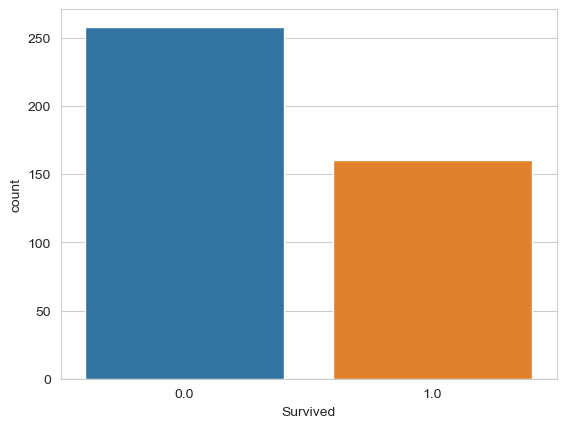

In [629]:
sns.countplot(sub['Survived'] )

In [630]:
sub.to_csv('Sumbission', index=False)